In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from mpl_toolkits import mplot3d

import imblearn
from imblearn.over_sampling import RandomOverSampler

In [2]:
def definingParamsLinear(X, y, Xval, yval,vals):
    acc = 0
    best_C=0
    for i in vals:
        C= i
        classifier = SVC(C=C, kernel="linear")
        classifier.fit(X,y)
        prediction = classifier.predict(Xval)
        score = classifier.score(Xval,yval)
        if score>acc:
            acc =score
            best_C =C
    return best_C

def definingParamsGaussian(X, y, Xval, yval,vals):
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma, kernel="rbf")
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

In [3]:
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
data = pnd.read_csv("processed.cleveland.csv", names=relevant_features)

data.drop(data[data["ca"] == '?'].index, inplace=True)
data.drop(data[data["thal"] == '?'].index, inplace=True)
data = data.astype('float64') 

In [4]:
data.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  diagnosis  
0    3.0  0.0   6.0        0.0  
1    2.0  3.0   3.0        2.0  
2    2.0  2.0   7.0        1.0  
3    3.0  0.0   3.0        0.0  
4    1.0  0.0   3.0        0.0

In [5]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal   diagnosis  
count  297.000000  297.000000  
mean     4.730640    0.946128  
std      1.938629    1.234551  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

In [6]:
data_binary = data.copy()
data_binary["diagnosis"] = data_binary.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data_binary.describe()

age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal   diagnosis  
count  297.000000  297.000000  
mean     4.730640    0.461279  
std      1.938629    0.499340  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

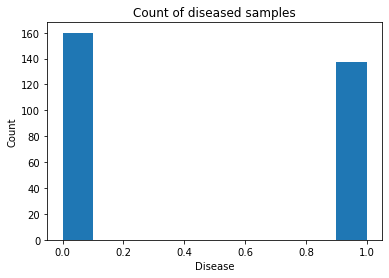

In [7]:
vals = [2**-10,2**-9,2**-8,2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2,2**3,2**4,2**5,2**5,2**6,2**7,2**8,2**9,2**10]

data_binary_n = data_binary.values

X_binary = data_binary_n[:,:-1]
y_binary = data_binary_n[:,-1]

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

X_binary, mean_X, std_X = featureNormalization(X_binary)

In [8]:
all_best_accuracy_train_linear = []
all_best_accuracy_test_linear = []
all_best_f1_score_linear = []
all_tn_linear = []
all_fn_linear = []
all_fp_linear = []
all_tp_linear = []

K = 5

all_best_accuracy_train_gaussian = []
all_best_accuracy_test_gaussian = []
all_best_f1_score_gaussian = []
all_tn_gaussian = []
all_fn_gaussian = []
all_fp_gaussian = []
all_tp_gaussian = []

for x in range(30):
    cv = KFold(n_splits = K, shuffle=True)

    accuracy_train_linear = []
    best_accuracy_train_linear = 0

    accuracy_test_linear = []
    best_accuracy_test_linear = 0

    # Best_Cs_linear = []

    accuracy_train_gaussian = []
    best_accuracy_train_gaussian = 0

    accuracy_test_gaussian = []
    best_accuracy_test_gaussian = 0

    Best_Cs_gaussian = []
    Best_Sigmas_gaussian = []

    for i in vals:
        accuracies_train_linear = 0
        accuracies_test_linear = 0
        f1_scores_test_linear = 0
        for train_index, test_index in cv.split(X_binary): 

            X_binary_train, X_binary_test, y_binary_train, y_binary_test = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
    
            classifier_linear = SVC(C=i, kernel="linear")
            classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))
            prediction_linear = classifier_linear.predict(X_binary_train)
            accuracyTrain_linear = metrics.accuracy_score(y_binary_train, prediction_linear)
            accuracies_train_linear += accuracyTrain_linear
            
            prediction_linear = classifier_linear.predict(X_binary_test)
            accuracyTest_linear = metrics.accuracy_score(y_binary_test, prediction_linear)
            accuracies_test_linear += accuracyTest_linear
            f1_score_linear = metrics.f1_score(y_binary_test, prediction_linear)
            f1_scores_test_linear += f1_score_linear

        accuraciesTrain_linear = accuracies_train_linear/K
        accuracy_train_linear.append(accuraciesTrain_linear)

        accuraciesTest_linear = accuracies_test_linear/K
        accuracy_test_linear.append(accuraciesTest_linear)

        f1_scoresTest_linear = f1_scores_test_linear/K

        if(accuraciesTrain_linear - accuraciesTest_linear < 0.1 and accuraciesTrain_linear > accuraciesTest_linear and accuraciesTrain_linear > 0.8):
            if(accuraciesTrain_linear > best_accuracy_train_linear and accuraciesTest_linear == best_accuracy_test_linear):
                best_accuracy_train_linear = accuraciesTrain_linear
                Best_C_linear = i
            elif(accuraciesTrain_linear == best_accuracy_train_linear and accuraciesTest_linear > best_accuracy_test_linear):
                best_accuracy_test_linear = accuraciesTest_linear
                Best_C_gaussian = i
            elif(accuraciesTrain_linear > best_accuracy_train_linear and accuraciesTest_linear > best_accuracy_test_linear):
                best_accuracy_train_linear = accuraciesTrain_linear
                best_accuracy_test_linear = accuraciesTest_linear
                Best_C_linear = i
                best_f1_score_linear = f1_scoresTest_linear
                cm_test = confusion_matrix(prediction_linear, y_binary_test)
                tn_linear = cm_test[0][0]
                fp_linear = cm_test[1][0]
                fn_linear = cm_test[0][1]
                tp_linear = cm_test[1][1]
                    
    all_best_accuracy_train_linear.append(best_accuracy_train_linear)
    all_best_accuracy_test_linear.append(best_accuracy_test_linear)
    all_best_f1_score_linear.append(best_f1_score_linear)
    all_tn_linear.append(tn_linear)
    all_fn_linear.append(fn_linear)
    all_fp_linear.append(fp_linear)
    all_tp_linear.append(tp_linear)

    
    for i in vals:
        for j in vals:
            accuracies_train_gaussian = 0
            accuracies_test_gaussian = 0
            f1_scores_test_gaussian = 0
            for train_index, test_index in cv.split(X_binary): 

                X_binary_train, X_binary_test, y_binary_train, y_binary_test = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
        
                classifier_gaussian = SVC(C=i, gamma=1/j, kernel="rbf")
                classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))
                prediction_gaussian = classifier_gaussian.predict(X_binary_train)
                accuracyTrain_gaussian = metrics.accuracy_score(y_binary_train, prediction_gaussian)
                accuracies_train_gaussian += accuracyTrain_gaussian
                
                prediction_gaussian = classifier_gaussian.predict(X_binary_test)
                accuracyTest_gaussian = metrics.accuracy_score(y_binary_test, prediction_gaussian)
                accuracies_test_gaussian += accuracyTest_gaussian
                f1_score_gaussian = metrics.f1_score(y_binary_test, prediction_gaussian)
                f1_scores_test_gaussian += f1_score_gaussian

            accuraciesTrain_gaussian = accuracies_train_gaussian/K
            accuracy_train_gaussian.append(accuraciesTrain_gaussian)

            accuraciesTest_gaussian = accuracies_test_gaussian/K
            accuracy_test_gaussian.append(accuraciesTest_gaussian)

            f1_scoresTest_gaussian = f1_scores_test_gaussian/K

            if(accuraciesTrain_gaussian - accuraciesTest_gaussian < 0.1 and accuraciesTrain_gaussian > accuraciesTest_gaussian and accuraciesTrain_gaussian > 0.8):
                if(accuraciesTrain_gaussian > best_accuracy_train_gaussian and accuraciesTest_gaussian == best_accuracy_test_gaussian):
                    best_accuracy_train_gaussian = accuraciesTrain_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                elif(accuraciesTrain_gaussian == best_accuracy_train_gaussian and accuraciesTest_gaussian > best_accuracy_test_gaussian):
                    best_accuracy_test_gaussian = accuraciesTest_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                elif(accuraciesTrain_gaussian > best_accuracy_train_gaussian and accuraciesTest_gaussian > best_accuracy_test_gaussian):
                    best_accuracy_train_gaussian = accuraciesTrain_gaussian
                    best_accuracy_test_gaussian = accuraciesTest_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                    best_f1_score_gaussian = f1_scoresTest_gaussian
                    cm_test = confusion_matrix(prediction_gaussian, y_binary_test)
                    tn_gaussian = cm_test[0][0]
                    fp_gaussian = cm_test[1][0]
                    fn_gaussian = cm_test[0][1]
                    tp_gaussian = cm_test[1][1]
                    
    all_best_accuracy_train_gaussian.append(best_accuracy_train_gaussian)
    all_best_accuracy_test_gaussian.append(best_accuracy_test_gaussian)
    all_best_f1_score_gaussian.append(best_f1_score_gaussian)
    all_tn_gaussian.append(tn_gaussian)
    all_fn_gaussian.append(fn_gaussian)
    all_fp_gaussian.append(fp_gaussian)
    all_tp_gaussian.append(tp_gaussian)

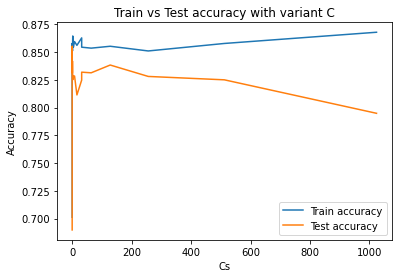

In [9]:
plt.plot(vals,accuracy_train_linear)
plt.plot(vals,accuracy_test_linear)
plt.ylabel("Accuracy")
plt.xlabel("Cs")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Train vs Test accuracy with variant C")
plt.show()

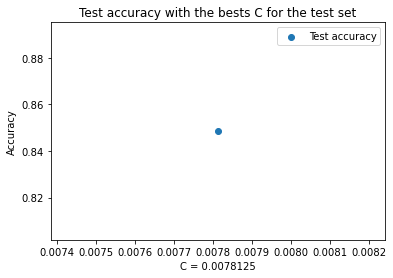

In [10]:
plt.scatter(Best_C_linear,best_accuracy_test_linear)
plt.ylabel("Accuracy")
plt.xlabel("C = " + str(Best_C_linear))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the bests C for the test set")
plt.show()

Mean linear kernel classification:  0.855866988145469
Mean linear kernel accuracy:  0.8474048964218456
Mean linear kernel F1:  0.8230152843739026


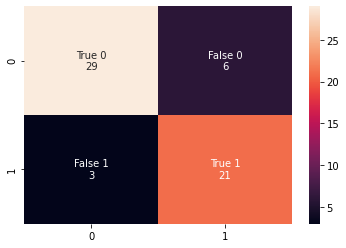

In [11]:
cm_linear = np.array([np.around(np.mean(all_tn_linear), 0), np.around(np.mean(all_fn_linear), 0), np.around(np.mean(all_fp_linear), 0), np.around(np.mean(all_tp_linear), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_linear]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_linear.reshape(2,2), annot=labels, fmt="")

print("Mean linear kernel classification: ", np.mean(all_best_accuracy_train_linear))
print("Mean linear kernel accuracy: ", np.mean(all_best_accuracy_test_linear))
print("Mean linear kernel F1: ", np.mean(all_best_f1_score_linear))

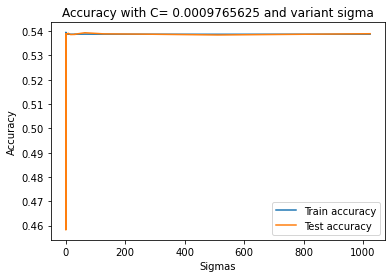

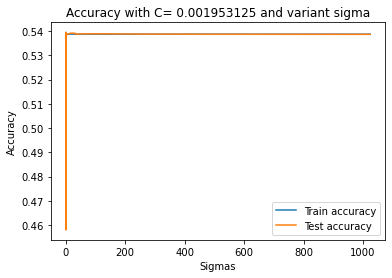

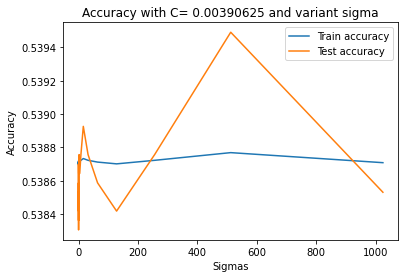

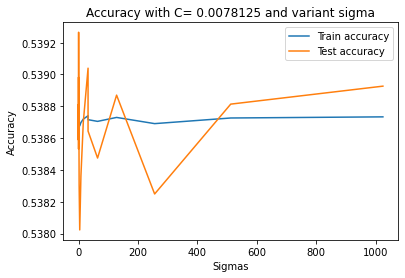

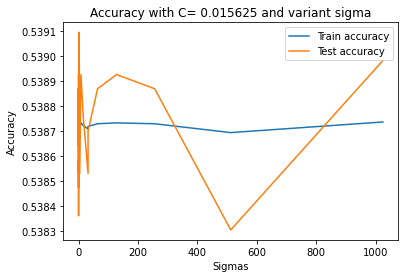

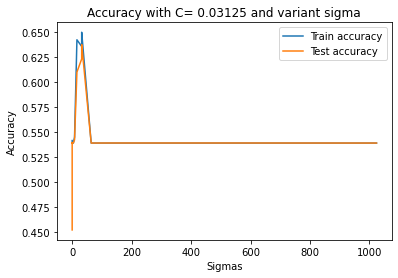

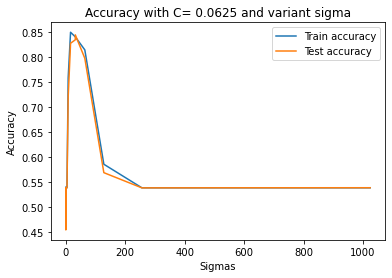

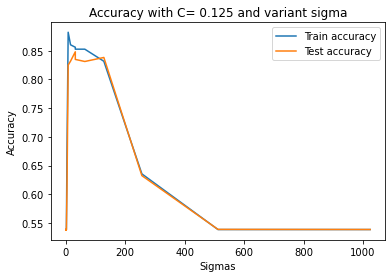

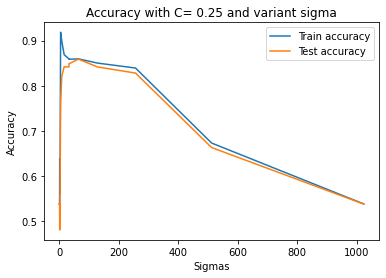

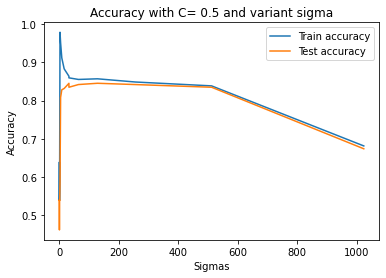

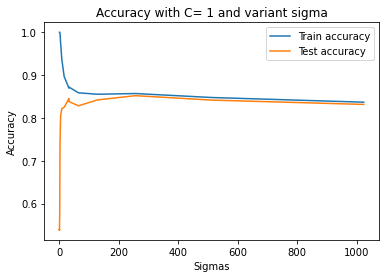

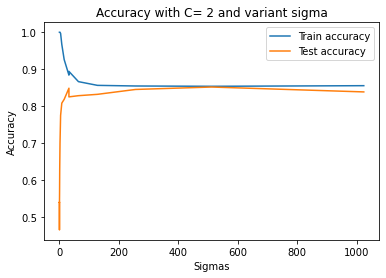

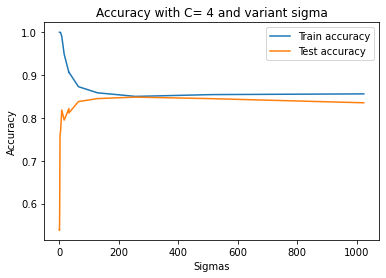

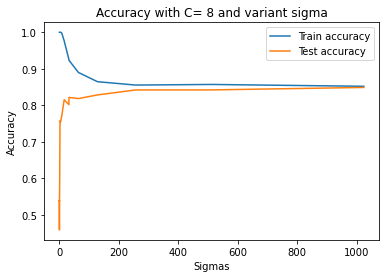

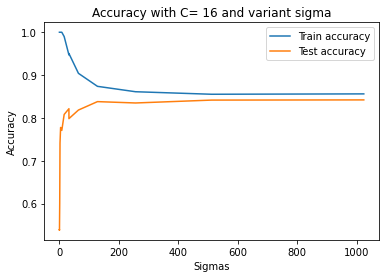

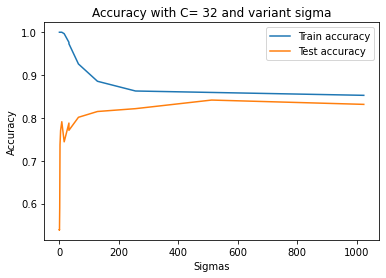

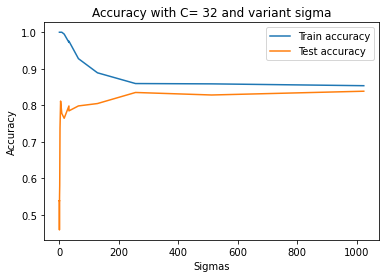

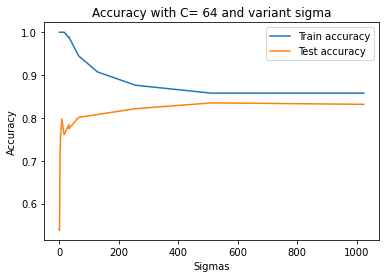

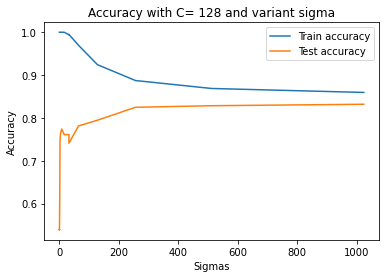

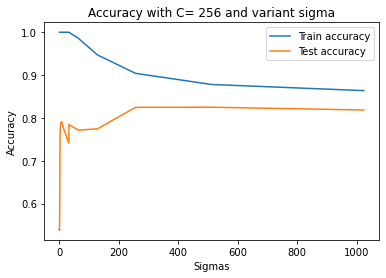

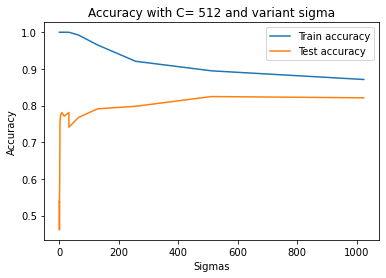

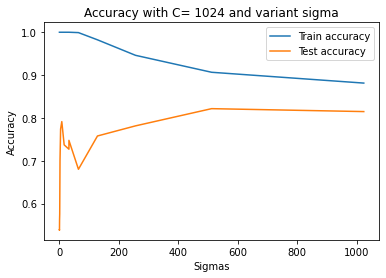

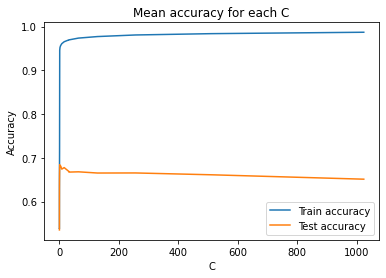

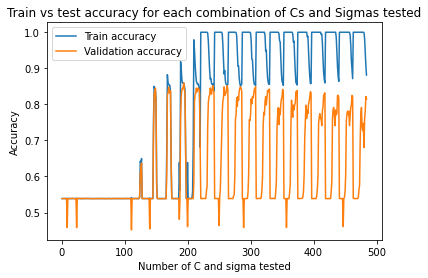

0.8838244158422863
0.8483615819209038


In [12]:
mean_acc_train_fixed_c = []
mean_acc_test_fixed_c = []

for i in range(len(vals)):
    plt.plot(vals,accuracy_train_gaussian[22*i:22*(i+1)])
    plt.plot(vals,accuracy_test_gaussian[22*i:22*(i+1)])
    mean_acc_train_fixed_c.append(np.mean(accuracy_train_gaussian[22*i:22*(i+1)]))
    mean_acc_test_fixed_c.append(np.mean(accuracy_test_gaussian[22*i:22*(i+1)]))
    plt.ylabel("Accuracy")
    plt.xlabel("Sigmas")
    plt.legend(["Train accuracy","Test accuracy"])
    plt.title("Accuracy with C= "+str(vals[i])+ " and variant sigma")
    plt.show()

plt.plot(vals, mean_acc_train_fixed_c)
plt.plot(vals, mean_acc_test_fixed_c)
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Mean accuracy for each C")
plt.show()

plt.plot(range(1,len(accuracy_train_gaussian)+1),accuracy_train_gaussian)
plt.plot(range(1,len(accuracy_test_gaussian)+1),accuracy_test_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("Number of C and sigma tested")
plt.legend(["Train accuracy", "Validation accuracy"])
plt.title("Train vs test accuracy for each combination of Cs and Sigmas tested")
plt.show()

print(best_accuracy_train_gaussian)
print(best_accuracy_test_gaussian)

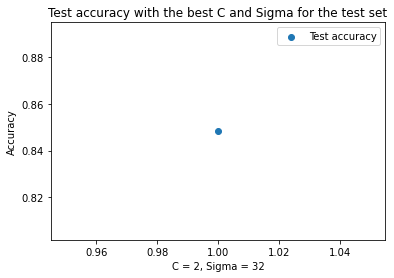

In [13]:
plt.scatter(1,best_accuracy_test_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("C = " +str(Best_C_gaussian)+", Sigma = "+str(Best_Sigma_gaussian))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the best C and Sigma for the test set")
plt.show()

Mean gaussian kernel classification:  0.8759007906960252
Mean gaussian kernel accuracy:  0.8457457627118644
Mean gaussian kernel F1:  0.8235072691572091


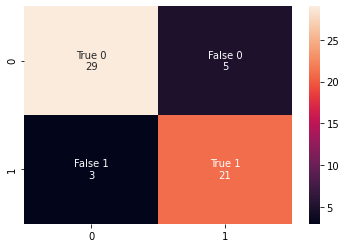

In [14]:
cm_gaussian = np.array([np.around(np.mean(all_tn_gaussian), 0), np.around(np.mean(all_fn_gaussian), 0), np.around(np.mean(all_fp_gaussian), 0), np.around(np.mean(all_tp_gaussian), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_gaussian]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gaussian.reshape(2,2), annot=labels, fmt="")

print("Mean gaussian kernel classification: ", np.mean(all_best_accuracy_train_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(all_best_accuracy_test_gaussian))
print("Mean gaussian kernel F1: ", np.mean(all_best_f1_score_gaussian))

In [15]:
all_best_accuracy_train_linear = []
all_best_accuracy_test_linear = []
all_best_f1_score_linear = []
all_tn_linear = []
all_fn_linear = []
all_fp_linear = []
all_tp_linear = []

K = 10

all_best_accuracy_train_gaussian = []
all_best_accuracy_test_gaussian = []
all_best_f1_score_gaussian = []
all_tn_gaussian = []
all_fn_gaussian = []
all_fp_gaussian = []
all_tp_gaussian = []

for x in range(30):
    cv = KFold(n_splits = K, shuffle=True)

    accuracy_train_linear = []
    best_accuracy_train_linear = 0

    accuracy_test_linear = []
    best_accuracy_test_linear = 0

    accuracy_train_gaussian = []
    best_accuracy_train_gaussian = 0

    accuracy_test_gaussian = []
    best_accuracy_test_gaussian = 0

    Best_Cs_gaussian = []
    Best_Sigmas_gaussian = []

    for i in vals:
        accuracies_train_linear = 0
        accuracies_test_linear = 0
        f1_scores_test_linear = 0
        for train_index, test_index in cv.split(X_binary): 

            X_binary_train, X_binary_test, y_binary_train, y_binary_test = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
    
            classifier_linear = SVC(C=i, kernel="linear")
            classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))
            prediction_linear = classifier_linear.predict(X_binary_train)
            accuracyTrain_linear = metrics.accuracy_score(y_binary_train, prediction_linear)
            accuracies_train_linear += accuracyTrain_linear
            
            prediction_linear = classifier_linear.predict(X_binary_test)
            accuracyTest_linear = metrics.accuracy_score(y_binary_test, prediction_linear)
            accuracies_test_linear += accuracyTest_linear
            f1_score_linear = metrics.f1_score(y_binary_test, prediction_linear)
            f1_scores_test_linear += f1_score_linear

        accuraciesTrain_linear = accuracies_train_linear/K
        accuracy_train_linear.append(accuraciesTrain_linear)

        accuraciesTest_linear = accuracies_test_linear/K
        accuracy_test_linear.append(accuraciesTest_linear)

        f1_scoresTest_linear = f1_scores_test_linear/K

        if(accuraciesTrain_linear - accuraciesTest_linear < 0.1 and accuraciesTrain_linear > accuraciesTest_linear and accuraciesTrain_linear > 0.8):
            if(accuraciesTrain_linear > best_accuracy_train_linear and accuraciesTest_linear == best_accuracy_test_linear):
                best_accuracy_train_linear = accuraciesTrain_linear
                Best_C_linear = i
            elif(accuraciesTrain_linear == best_accuracy_train_linear and accuraciesTest_linear > best_accuracy_test_linear):
                best_accuracy_test_linear = accuraciesTest_linear
                Best_C_gaussian = i
            elif(accuraciesTrain_linear > best_accuracy_train_linear and accuraciesTest_linear > best_accuracy_test_linear):
                best_accuracy_train_linear = accuraciesTrain_linear
                best_accuracy_test_linear = accuraciesTest_linear
                Best_C_linear = i
                best_f1_score_linear = f1_scoresTest_linear
                cm_test = confusion_matrix(prediction_linear, y_binary_test)
                tn_linear = cm_test[0][0]
                fp_linear = cm_test[1][0]
                fn_linear = cm_test[0][1]
                tp_linear = cm_test[1][1]
                    
    all_best_accuracy_train_linear.append(best_accuracy_train_linear)
    all_best_accuracy_test_linear.append(best_accuracy_test_linear)
    all_best_f1_score_linear.append(best_f1_score_linear)
    all_tn_linear.append(tn_linear)
    all_fn_linear.append(fn_linear)
    all_fp_linear.append(fp_linear)
    all_tp_linear.append(tp_linear)

    
    for i in vals:
        for j in vals:
            accuracies_train_gaussian = 0
            accuracies_test_gaussian = 0
            f1_scores_test_gaussian = 0
            for train_index, test_index in cv.split(X_binary): 

                X_binary_train, X_binary_test, y_binary_train, y_binary_test = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
        
                classifier_gaussian = SVC(C=i, gamma=1/j, kernel="rbf")
                classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))
                prediction_gaussian = classifier_gaussian.predict(X_binary_train)
                accuracyTrain_gaussian = metrics.accuracy_score(y_binary_train, prediction_gaussian)
                accuracies_train_gaussian += accuracyTrain_gaussian
                
                prediction_gaussian = classifier_gaussian.predict(X_binary_test)
                accuracyTest_gaussian = metrics.accuracy_score(y_binary_test, prediction_gaussian)
                accuracies_test_gaussian += accuracyTest_gaussian
                f1_score_gaussian = metrics.f1_score(y_binary_test, prediction_gaussian)
                f1_scores_test_gaussian += f1_score_gaussian

            accuraciesTrain_gaussian = accuracies_train_gaussian/K
            accuracy_train_gaussian.append(accuraciesTrain_gaussian)

            accuraciesTest_gaussian = accuracies_test_gaussian/K
            accuracy_test_gaussian.append(accuraciesTest_gaussian)

            f1_scoresTest_gaussian = f1_scores_test_gaussian/K

            if(accuraciesTrain_gaussian - accuraciesTest_gaussian < 0.1 and accuraciesTrain_gaussian > accuraciesTest_gaussian and accuraciesTrain_gaussian > 0.8):
                if(accuraciesTrain_gaussian > best_accuracy_train_gaussian and accuraciesTest_gaussian == best_accuracy_test_gaussian):
                    best_accuracy_train_gaussian = accuraciesTrain_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                elif(accuraciesTrain_gaussian == best_accuracy_train_gaussian and accuraciesTest_gaussian > best_accuracy_test_gaussian):
                    best_accuracy_test_gaussian = accuraciesTest_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                elif(accuraciesTrain_gaussian > best_accuracy_train_gaussian and accuraciesTest_gaussian > best_accuracy_test_gaussian):
                    best_accuracy_train_gaussian = accuraciesTrain_gaussian
                    best_accuracy_test_gaussian = accuraciesTest_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                    best_f1_score_gaussian = f1_scoresTest_gaussian
                    cm_test = confusion_matrix(prediction_gaussian, y_binary_test)
                    tn_gaussian = cm_test[0][0]
                    fp_gaussian = cm_test[1][0]
                    fn_gaussian = cm_test[0][1]
                    tp_gaussian = cm_test[1][1]
                    
    all_best_accuracy_train_gaussian.append(best_accuracy_train_gaussian)
    all_best_accuracy_test_gaussian.append(best_accuracy_test_gaussian)
    all_best_f1_score_gaussian.append(best_f1_score_gaussian)
    all_tn_gaussian.append(tn_gaussian)
    all_fn_gaussian.append(fn_gaussian)
    all_fp_gaussian.append(fp_gaussian)
    all_tp_gaussian.append(tp_gaussian)

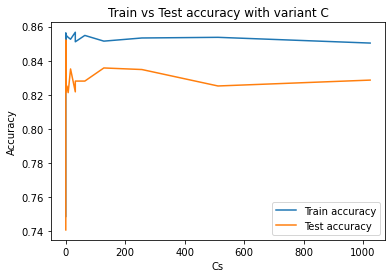

In [16]:
plt.plot(vals,accuracy_train_linear)
plt.plot(vals,accuracy_test_linear)
plt.ylabel("Accuracy")
plt.xlabel("Cs")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Train vs Test accuracy with variant C")
plt.show()

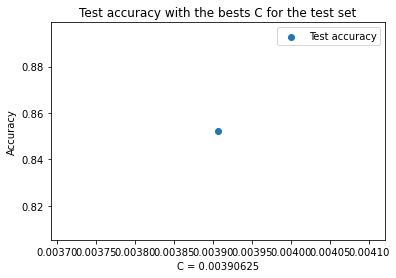

In [17]:
plt.scatter(Best_C_linear,best_accuracy_test_linear)
plt.ylabel("Accuracy")
plt.xlabel("C = " + str(Best_C_linear))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the bests C for the test set")
plt.show()

Mean linear kernel classification:  0.8562910168259825
Mean linear kernel accuracy:  0.8487279693486591
Mean linear kernel F1:  0.8221420714359045


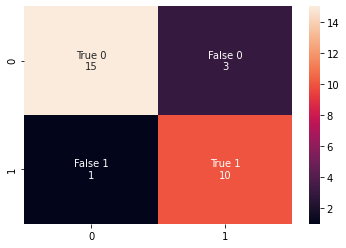

In [18]:
cm_linear = np.array([np.around(np.mean(all_tn_linear), 0), np.around(np.mean(all_fn_linear), 0), np.around(np.mean(all_fp_linear), 0), np.around(np.mean(all_tp_linear), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_linear]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_linear.reshape(2,2), annot=labels, fmt="")

print("Mean linear kernel classification: ", np.mean(all_best_accuracy_train_linear))
print("Mean linear kernel accuracy: ", np.mean(all_best_accuracy_test_linear))
print("Mean linear kernel F1: ", np.mean(all_best_f1_score_linear))

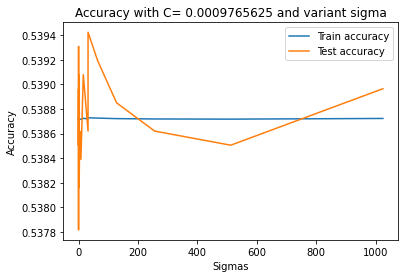

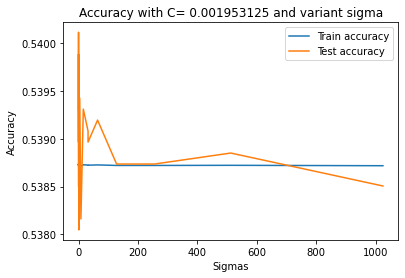

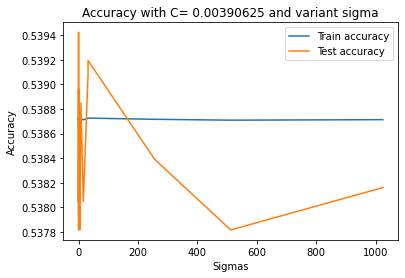

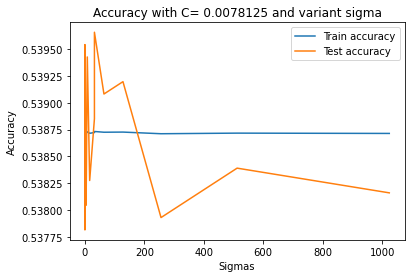

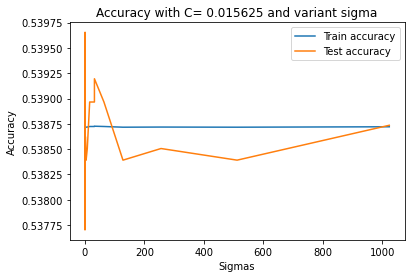

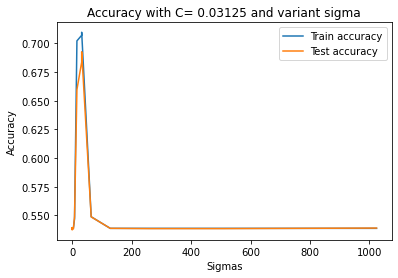

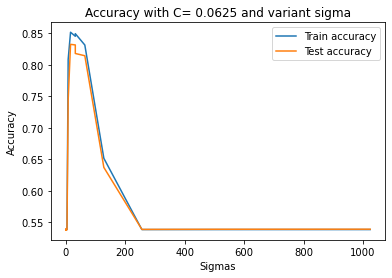

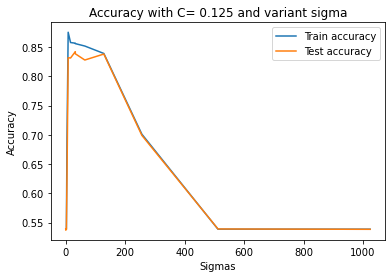

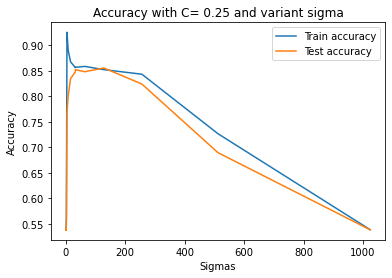

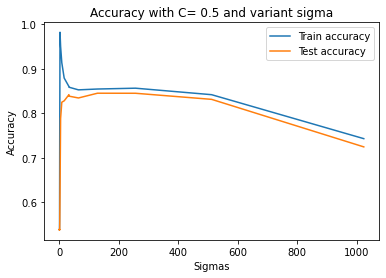

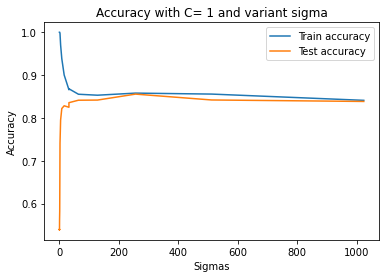

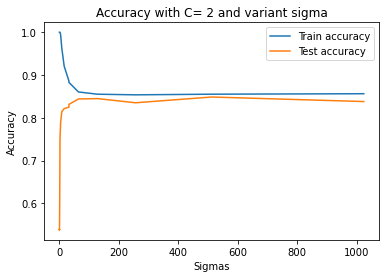

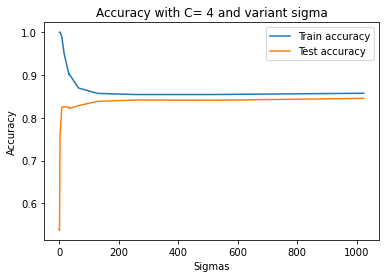

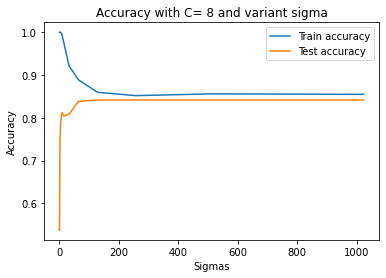

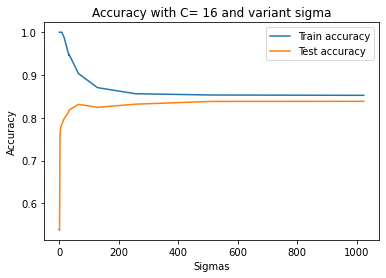

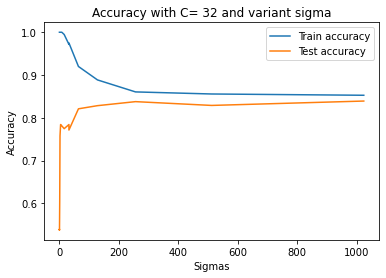

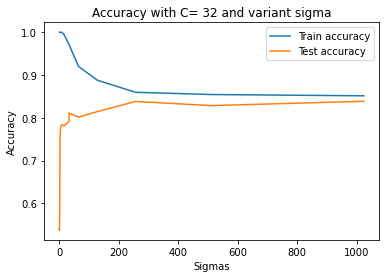

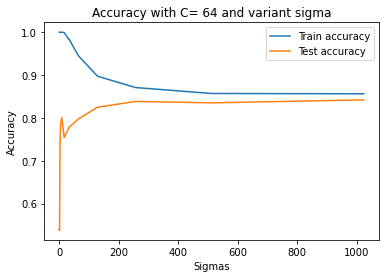

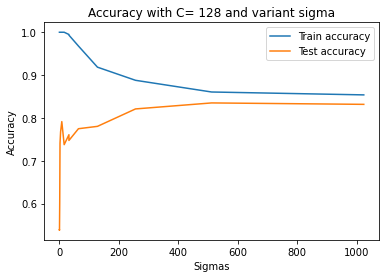

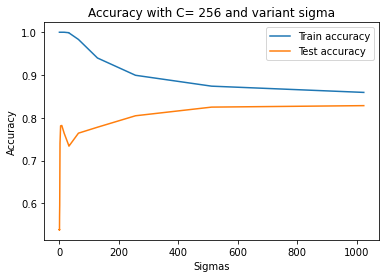

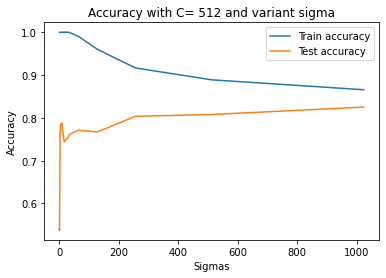

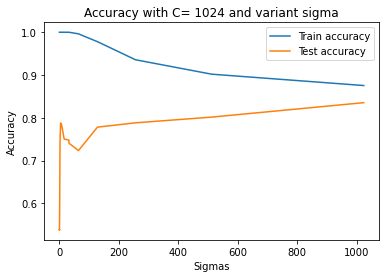

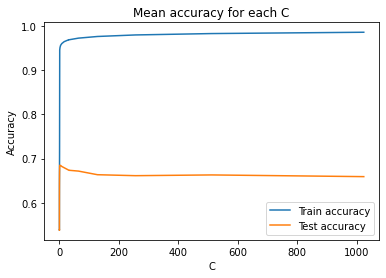

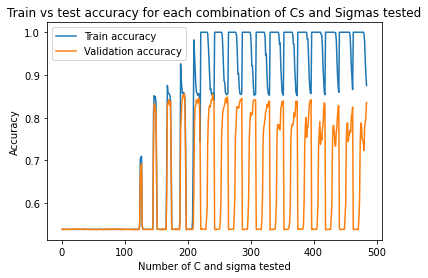

0.8578428084297613
0.8555172413793105


In [19]:
mean_acc_train_fixed_c = []
mean_acc_test_fixed_c = []

for i in range(len(vals)):
    plt.plot(vals,accuracy_train_gaussian[22*i:22*(i+1)])
    plt.plot(vals,accuracy_test_gaussian[22*i:22*(i+1)])
    mean_acc_train_fixed_c.append(np.mean(accuracy_train_gaussian[22*i:22*(i+1)]))
    mean_acc_test_fixed_c.append(np.mean(accuracy_test_gaussian[22*i:22*(i+1)]))
    plt.ylabel("Accuracy")
    plt.xlabel("Sigmas")
    plt.legend(["Train accuracy","Test accuracy"])
    plt.title("Accuracy with C= "+str(vals[i])+ " and variant sigma")
    plt.show()

plt.plot(vals, mean_acc_train_fixed_c)
plt.plot(vals, mean_acc_test_fixed_c)
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Mean accuracy for each C")
plt.show()

plt.plot(range(1,len(accuracy_train_gaussian)+1),accuracy_train_gaussian)
plt.plot(range(1,len(accuracy_test_gaussian)+1),accuracy_test_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("Number of C and sigma tested")
plt.legend(["Train accuracy", "Validation accuracy"])
plt.title("Train vs test accuracy for each combination of Cs and Sigmas tested")
plt.show()

print(best_accuracy_train_gaussian)
print(best_accuracy_test_gaussian)

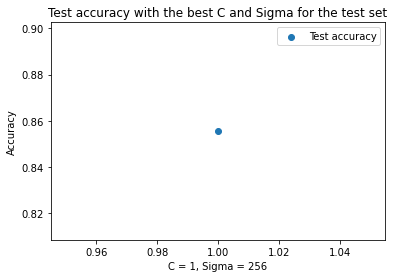

In [20]:
plt.scatter(1,best_accuracy_test_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("C = " +str(Best_C_gaussian)+", Sigma = "+str(Best_Sigma_gaussian))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the best C and Sigma for the test set")
plt.show()

Mean gaussian kernel classification:  0.8782028527773119
Mean gaussian kernel accuracy:  0.8432911877394635
Mean gaussian kernel F1:  0.818387361003602


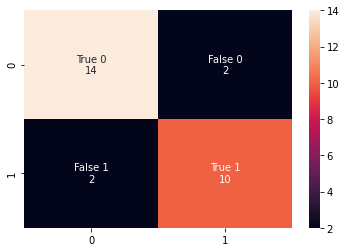

In [21]:
cm_gaussian = np.array([np.around(np.mean(all_tn_gaussian), 0), np.around(np.mean(all_fn_gaussian), 0), np.around(np.mean(all_fp_gaussian), 0), np.around(np.mean(all_tp_gaussian), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_gaussian]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gaussian.reshape(2,2), annot=labels, fmt="")

print("Mean gaussian kernel classification: ", np.mean(all_best_accuracy_train_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(all_best_accuracy_test_gaussian))
print("Mean gaussian kernel F1: ", np.mean(all_best_f1_score_gaussian))

(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

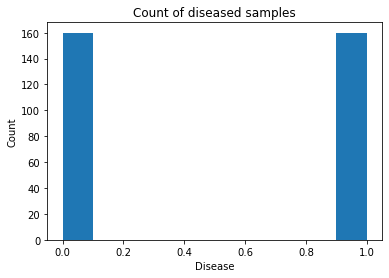

In [22]:
ros = RandomOverSampler()
X_binary, y_binary = ros.fit_sample(X_binary, y_binary)

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

In [23]:
all_best_accuracy_train_linear = []
all_best_accuracy_test_linear = []
all_best_f1_score_linear = []
all_tn_linear = []
all_fn_linear = []
all_fp_linear = []
all_tp_linear = []

K = 5

all_best_accuracy_train_gaussian = []
all_best_accuracy_test_gaussian = []
all_best_f1_score_gaussian = []
all_tn_gaussian = []
all_fn_gaussian = []
all_fp_gaussian = []
all_tp_gaussian = []

for x in range(30):
    cv = KFold(n_splits = K, shuffle=True)

    accuracy_train_linear = []
    best_accuracy_train_linear = 0

    accuracy_test_linear = []
    best_accuracy_test_linear = 0

    accuracy_train_gaussian = []
    best_accuracy_train_gaussian = 0

    accuracy_test_gaussian = []
    best_accuracy_test_gaussian = 0

    Best_Cs_gaussian = []
    Best_Sigmas_gaussian = []

    for i in vals:
        accuracies_train_linear = 0
        accuracies_test_linear = 0
        f1_scores_test_linear = 0
        for train_index, test_index in cv.split(X_binary): 

            X_binary_train, X_binary_test, y_binary_train, y_binary_test = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
    
            classifier_linear = SVC(C=i, kernel="linear")
            classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))
            prediction_linear = classifier_linear.predict(X_binary_train)
            accuracyTrain_linear = metrics.accuracy_score(y_binary_train, prediction_linear)
            accuracies_train_linear += accuracyTrain_linear
            
            prediction_linear = classifier_linear.predict(X_binary_test)
            accuracyTest_linear = metrics.accuracy_score(y_binary_test, prediction_linear)
            accuracies_test_linear += accuracyTest_linear
            f1_score_linear = metrics.f1_score(y_binary_test, prediction_linear)
            f1_scores_test_linear += f1_score_linear

        accuraciesTrain_linear = accuracies_train_linear/K
        accuracy_train_linear.append(accuraciesTrain_linear)

        accuraciesTest_linear = accuracies_test_linear/K
        accuracy_test_linear.append(accuraciesTest_linear)

        f1_scoresTest_linear = f1_scores_test_linear/K

        if(accuraciesTrain_linear - accuraciesTest_linear < 0.1 and accuraciesTrain_linear > accuraciesTest_linear and accuraciesTrain_linear > 0.8):
            if(accuraciesTrain_linear > best_accuracy_train_linear and accuraciesTest_linear == best_accuracy_test_linear):
                best_accuracy_train_linear = accuraciesTrain_linear
                Best_C_linear = i
            elif(accuraciesTrain_linear == best_accuracy_train_linear and accuraciesTest_linear > best_accuracy_test_linear):
                best_accuracy_test_linear = accuraciesTest_linear
                Best_C_gaussian = i
            elif(accuraciesTrain_linear > best_accuracy_train_linear and accuraciesTest_linear > best_accuracy_test_linear):
                best_accuracy_train_linear = accuraciesTrain_linear
                best_accuracy_test_linear = accuraciesTest_linear
                Best_C_linear = i
                best_f1_score_linear = f1_scoresTest_linear
                cm_test = confusion_matrix(prediction_linear, y_binary_test)
                tn_linear = cm_test[0][0]
                fp_linear = cm_test[1][0]
                fn_linear = cm_test[0][1]
                tp_linear = cm_test[1][1]
                    
    all_best_accuracy_train_linear.append(best_accuracy_train_linear)
    all_best_accuracy_test_linear.append(best_accuracy_test_linear)
    all_best_f1_score_linear.append(best_f1_score_linear)
    all_tn_linear.append(tn_linear)
    all_fn_linear.append(fn_linear)
    all_fp_linear.append(fp_linear)
    all_tp_linear.append(tp_linear)

    
    for i in vals:
        for j in vals:
            accuracies_train_gaussian = 0
            accuracies_test_gaussian = 0
            f1_scores_test_gaussian = 0
            for train_index, test_index in cv.split(X_binary): 

                X_binary_train, X_binary_test, y_binary_train, y_binary_test = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
        
                classifier_gaussian = SVC(C=i, gamma=1/j, kernel="rbf")
                classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))
                prediction_gaussian = classifier_gaussian.predict(X_binary_train)
                accuracyTrain_gaussian = metrics.accuracy_score(y_binary_train, prediction_gaussian)
                accuracies_train_gaussian += accuracyTrain_gaussian
                
                prediction_gaussian = classifier_gaussian.predict(X_binary_test)
                accuracyTest_gaussian = metrics.accuracy_score(y_binary_test, prediction_gaussian)
                accuracies_test_gaussian += accuracyTest_gaussian
                f1_score_gaussian = metrics.f1_score(y_binary_test, prediction_gaussian)
                f1_scores_test_gaussian += f1_score_gaussian

            accuraciesTrain_gaussian = accuracies_train_gaussian/K
            accuracy_train_gaussian.append(accuraciesTrain_gaussian)

            accuraciesTest_gaussian = accuracies_test_gaussian/K
            accuracy_test_gaussian.append(accuraciesTest_gaussian)

            f1_scoresTest_gaussian = f1_scores_test_gaussian/K

            if(accuraciesTrain_gaussian - accuraciesTest_gaussian < 0.1 and accuraciesTrain_gaussian > accuraciesTest_gaussian and accuraciesTrain_gaussian > 0.8):
                if(accuraciesTrain_gaussian > best_accuracy_train_gaussian and accuraciesTest_gaussian == best_accuracy_test_gaussian):
                    best_accuracy_train_gaussian = accuraciesTrain_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                elif(accuraciesTrain_gaussian == best_accuracy_train_gaussian and accuraciesTest_gaussian > best_accuracy_test_gaussian):
                    best_accuracy_test_gaussian = accuraciesTest_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                elif(accuraciesTrain_gaussian > best_accuracy_train_gaussian and accuraciesTest_gaussian > best_accuracy_test_gaussian):
                    best_accuracy_train_gaussian = accuraciesTrain_gaussian
                    best_accuracy_test_gaussian = accuraciesTest_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                    best_f1_score_gaussian = f1_scoresTest_gaussian
                    cm_test = confusion_matrix(prediction_gaussian, y_binary_test)
                    tn_gaussian = cm_test[0][0]
                    fp_gaussian = cm_test[1][0]
                    fn_gaussian = cm_test[0][1]
                    tp_gaussian = cm_test[1][1]
                    
    all_best_accuracy_train_gaussian.append(best_accuracy_train_gaussian)
    all_best_accuracy_test_gaussian.append(best_accuracy_test_gaussian)
    all_best_f1_score_gaussian.append(best_f1_score_gaussian)
    all_tn_gaussian.append(tn_gaussian)
    all_fn_gaussian.append(fn_gaussian)
    all_fp_gaussian.append(fp_gaussian)
    all_tp_gaussian.append(tp_gaussian)

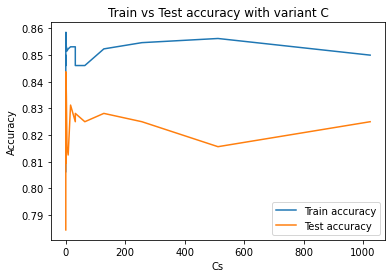

In [24]:
plt.plot(vals,accuracy_train_linear)
plt.plot(vals,accuracy_test_linear)
plt.ylabel("Accuracy")
plt.xlabel("Cs")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Train vs Test accuracy with variant C")
plt.show()

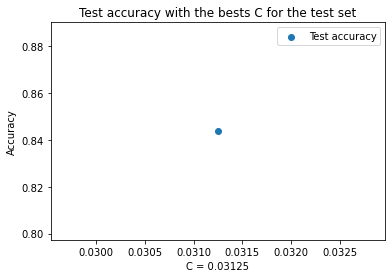

In [25]:
plt.scatter(Best_C_linear,best_accuracy_test_linear)
plt.ylabel("Accuracy")
plt.xlabel("C = " + str(Best_C_linear))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the bests C for the test set")
plt.show()

Mean linear kernel classification:  0.8477864583333332
Mean linear kernel accuracy:  0.8407291666666664
Mean linear kernel F1:  0.8310578733276551


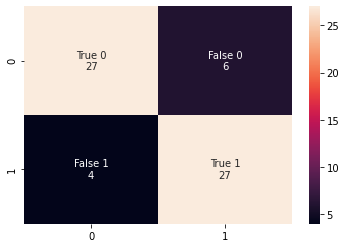

In [26]:
cm_linear = np.array([np.around(np.mean(all_tn_linear), 0), np.around(np.mean(all_fn_linear), 0), np.around(np.mean(all_fp_linear), 0), np.around(np.mean(all_tp_linear), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_linear]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_linear.reshape(2,2), annot=labels, fmt="")

print("Mean linear kernel classification: ", np.mean(all_best_accuracy_train_linear))
print("Mean linear kernel accuracy: ", np.mean(all_best_accuracy_test_linear))
print("Mean linear kernel F1: ", np.mean(all_best_f1_score_linear))

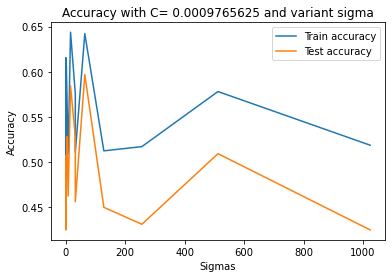

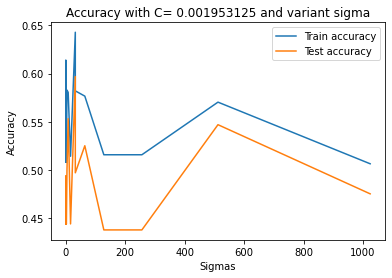

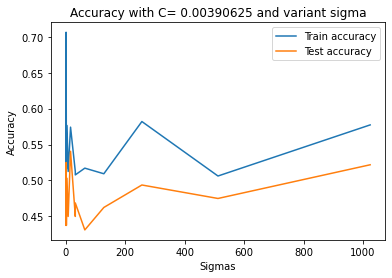

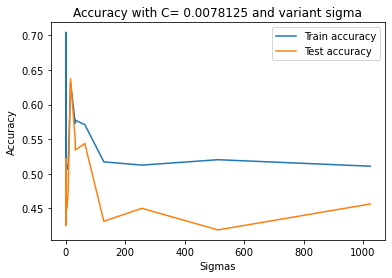

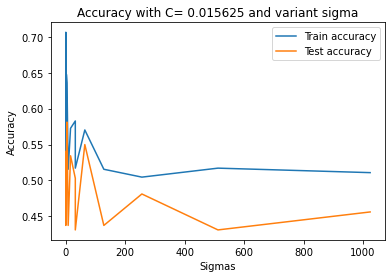

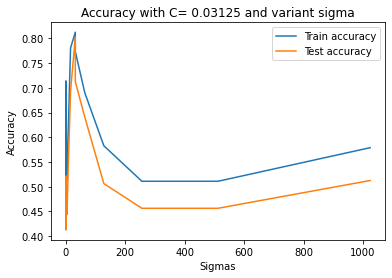

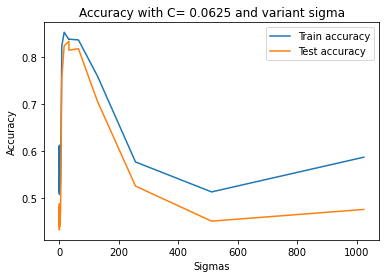

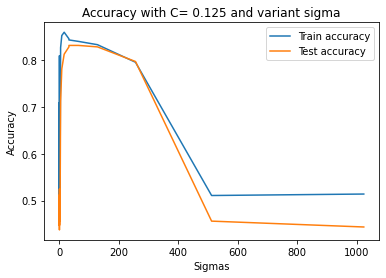

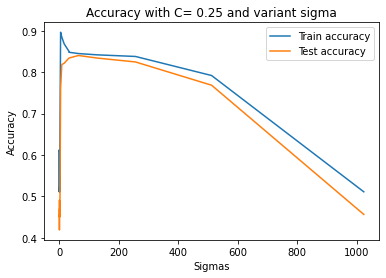

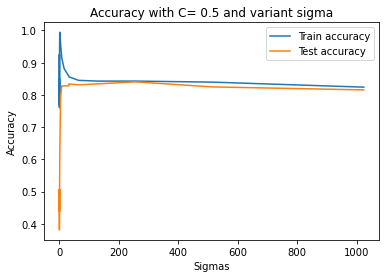

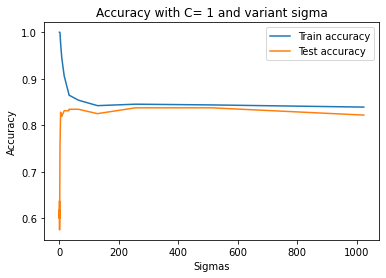

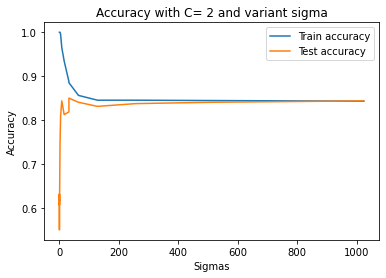

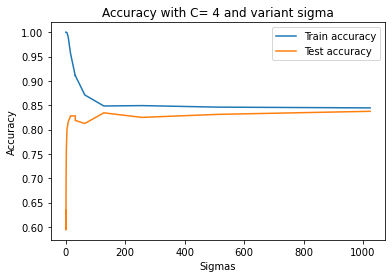

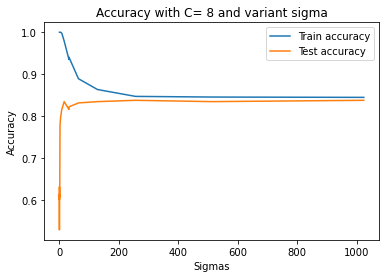

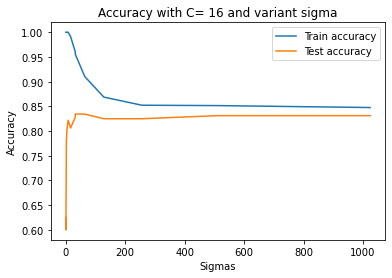

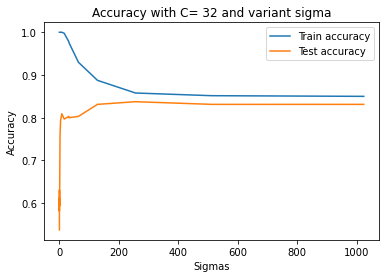

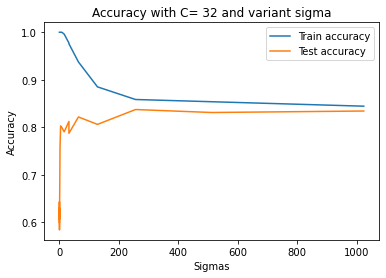

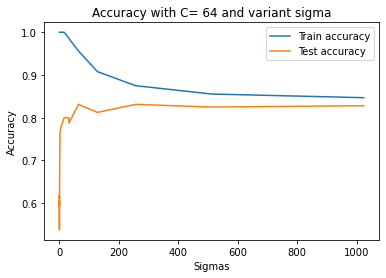

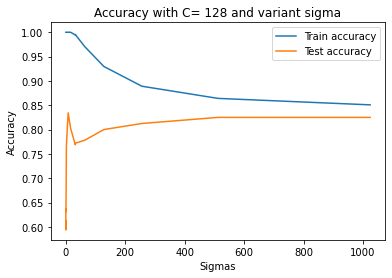

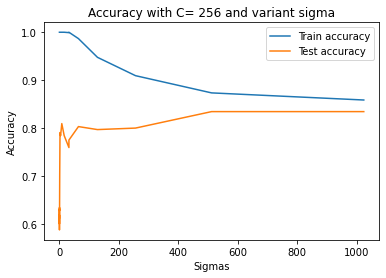

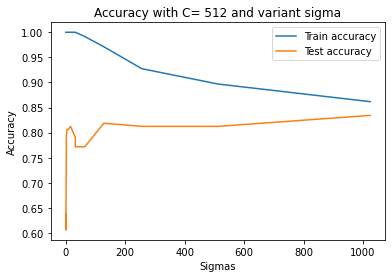

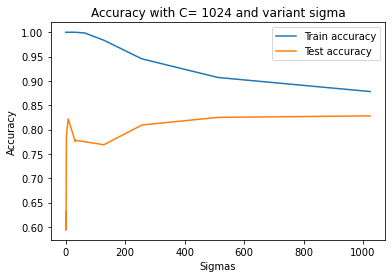

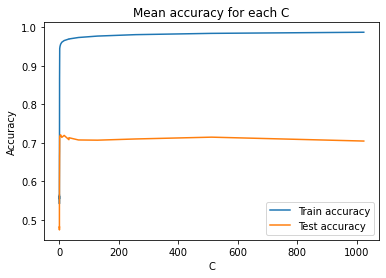

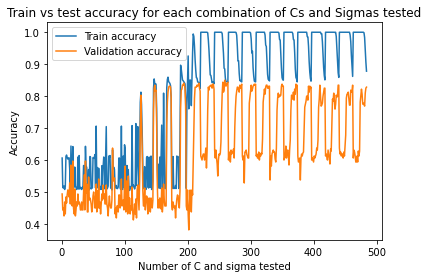

0.9140625
0.828125


In [27]:
mean_acc_train_fixed_c = []
mean_acc_test_fixed_c = []

for i in range(len(vals)):
    plt.plot(vals,accuracy_train_gaussian[22*i:22*(i+1)])
    plt.plot(vals,accuracy_test_gaussian[22*i:22*(i+1)])
    mean_acc_train_fixed_c.append(np.mean(accuracy_train_gaussian[22*i:22*(i+1)]))
    mean_acc_test_fixed_c.append(np.mean(accuracy_test_gaussian[22*i:22*(i+1)]))
    plt.ylabel("Accuracy")
    plt.xlabel("Sigmas")
    plt.legend(["Train accuracy","Test accuracy"])
    plt.title("Accuracy with C= "+str(vals[i])+ " and variant sigma")
    plt.show()

plt.plot(vals, mean_acc_train_fixed_c)
plt.plot(vals, mean_acc_test_fixed_c)
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Mean accuracy for each C")
plt.show()

plt.plot(range(1,len(accuracy_train_gaussian)+1),accuracy_train_gaussian)
plt.plot(range(1,len(accuracy_test_gaussian)+1),accuracy_test_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("Number of C and sigma tested")
plt.legend(["Train accuracy", "Validation accuracy"])
plt.title("Train vs test accuracy for each combination of Cs and Sigmas tested")
plt.show()

print(best_accuracy_train_gaussian)
print(best_accuracy_test_gaussian)

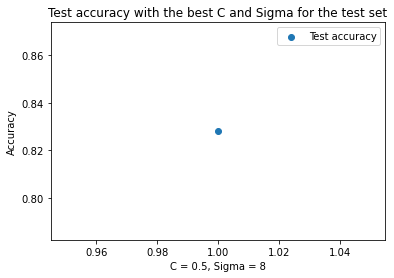

In [28]:
plt.scatter(1,best_accuracy_test_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("C = " +str(Best_C_gaussian)+", Sigma = "+str(Best_Sigma_gaussian))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the best C and Sigma for the test set")
plt.show()

Mean gaussian kernel classification:  0.921015625
Mean gaussian kernel accuracy:  0.8401041666666668
Mean gaussian kernel F1:  0.8385375183131915


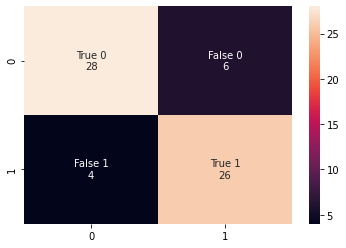

In [29]:
cm_gaussian = np.array([np.around(np.mean(all_tn_gaussian), 0), np.around(np.mean(all_fn_gaussian), 0), np.around(np.mean(all_fp_gaussian), 0), np.around(np.mean(all_tp_gaussian), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_gaussian]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gaussian.reshape(2,2), annot=labels, fmt="")

print("Mean gaussian kernel classification: ", np.mean(all_best_accuracy_train_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(all_best_accuracy_test_gaussian))
print("Mean gaussian kernel F1: ", np.mean(all_best_f1_score_gaussian))

In [30]:
all_best_accuracy_train_linear = []
all_best_accuracy_test_linear = []
all_best_f1_score_linear = []
all_tn_linear = []
all_fn_linear = []
all_fp_linear = []
all_tp_linear = []

K = 10

all_best_accuracy_train_gaussian = []
all_best_accuracy_test_gaussian = []
all_best_f1_score_gaussian = []
all_tn_gaussian = []
all_fn_gaussian = []
all_fp_gaussian = []
all_tp_gaussian = []

for x in range(30):
    cv = KFold(n_splits = K, shuffle=True)

    accuracy_train_linear = []
    best_accuracy_train_linear = 0

    accuracy_test_linear = []
    best_accuracy_test_linear = 0

    accuracy_train_gaussian = []
    best_accuracy_train_gaussian = 0

    accuracy_test_gaussian = []
    best_accuracy_test_gaussian = 0

    Best_Cs_gaussian = []
    Best_Sigmas_gaussian = []

    for i in vals:
        accuracies_train_linear = 0
        accuracies_test_linear = 0
        f1_scores_test_linear = 0
        for train_index, test_index in cv.split(X_binary): 

            X_binary_train, X_binary_test, y_binary_train, y_binary_test = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
    
            classifier_linear = SVC(C=i, kernel="linear")
            classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))
            prediction_linear = classifier_linear.predict(X_binary_train)
            accuracyTrain_linear = metrics.accuracy_score(y_binary_train, prediction_linear)
            accuracies_train_linear += accuracyTrain_linear
            
            prediction_linear = classifier_linear.predict(X_binary_test)
            accuracyTest_linear = metrics.accuracy_score(y_binary_test, prediction_linear)
            accuracies_test_linear += accuracyTest_linear
            f1_score_linear = metrics.f1_score(y_binary_test, prediction_linear)
            f1_scores_test_linear += f1_score_linear

        accuraciesTrain_linear = accuracies_train_linear/K
        accuracy_train_linear.append(accuraciesTrain_linear)

        accuraciesTest_linear = accuracies_test_linear/K
        accuracy_test_linear.append(accuraciesTest_linear)

        f1_scoresTest_linear = f1_scores_test_linear/K

        if(accuraciesTrain_linear - accuraciesTest_linear < 0.1 and accuraciesTrain_linear > accuraciesTest_linear and accuraciesTrain_linear > 0.8):
            if(accuraciesTrain_linear > best_accuracy_train_linear and accuraciesTest_linear == best_accuracy_test_linear):
                best_accuracy_train_linear = accuraciesTrain_linear
                Best_C_linear = i
            elif(accuraciesTrain_linear == best_accuracy_train_linear and accuraciesTest_linear > best_accuracy_test_linear):
                best_accuracy_test_linear = accuraciesTest_linear
                Best_C_gaussian = i
            elif(accuraciesTrain_linear > best_accuracy_train_linear and accuraciesTest_linear > best_accuracy_test_linear):
                best_accuracy_train_linear = accuraciesTrain_linear
                best_accuracy_test_linear = accuraciesTest_linear
                Best_C_linear = i
                best_f1_score_linear = f1_scoresTest_linear
                cm_test = confusion_matrix(prediction_linear, y_binary_test)
                tn_linear = cm_test[0][0]
                fp_linear = cm_test[1][0]
                fn_linear = cm_test[0][1]
                tp_linear = cm_test[1][1]
                    
    all_best_accuracy_train_linear.append(best_accuracy_train_linear)
    all_best_accuracy_test_linear.append(best_accuracy_test_linear)
    all_best_f1_score_linear.append(best_f1_score_linear)
    all_tn_linear.append(tn_linear)
    all_fn_linear.append(fn_linear)
    all_fp_linear.append(fp_linear)
    all_tp_linear.append(tp_linear)

    
    for i in vals:
        for j in vals:
            accuracies_train_gaussian = 0
            accuracies_test_gaussian = 0
            f1_scores_test_gaussian = 0
            for train_index, test_index in cv.split(X_binary): 

                X_binary_train, X_binary_test, y_binary_train, y_binary_test = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
        
                classifier_gaussian = SVC(C=i, gamma=1/j, kernel="rbf")
                classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))
                prediction_gaussian = classifier_gaussian.predict(X_binary_train)
                accuracyTrain_gaussian = metrics.accuracy_score(y_binary_train, prediction_gaussian)
                accuracies_train_gaussian += accuracyTrain_gaussian
                
                prediction_gaussian = classifier_gaussian.predict(X_binary_test)
                accuracyTest_gaussian = metrics.accuracy_score(y_binary_test, prediction_gaussian)
                accuracies_test_gaussian += accuracyTest_gaussian
                f1_score_gaussian = metrics.f1_score(y_binary_test, prediction_gaussian)
                f1_scores_test_gaussian += f1_score_gaussian

            accuraciesTrain_gaussian = accuracies_train_gaussian/K
            accuracy_train_gaussian.append(accuraciesTrain_gaussian)

            accuraciesTest_gaussian = accuracies_test_gaussian/K
            accuracy_test_gaussian.append(accuraciesTest_gaussian)

            f1_scoresTest_gaussian = f1_scores_test_gaussian/K

            if(accuraciesTrain_gaussian - accuraciesTest_gaussian < 0.1 and accuraciesTrain_gaussian > accuraciesTest_gaussian and accuraciesTrain_gaussian > 0.8):
                if(accuraciesTrain_gaussian > best_accuracy_train_gaussian and accuraciesTest_gaussian == best_accuracy_test_gaussian):
                    best_accuracy_train_gaussian = accuraciesTrain_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                elif(accuraciesTrain_gaussian == best_accuracy_train_gaussian and accuraciesTest_gaussian > best_accuracy_test_gaussian):
                    best_accuracy_test_gaussian = accuraciesTest_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                elif(accuraciesTrain_gaussian > best_accuracy_train_gaussian and accuraciesTest_gaussian > best_accuracy_test_gaussian):
                    best_accuracy_train_gaussian = accuraciesTrain_gaussian
                    best_accuracy_test_gaussian = accuraciesTest_gaussian
                    Best_C_gaussian = i
                    Best_Sigma_gaussian = j
                    best_f1_score_gaussian = f1_scoresTest_gaussian
                    cm_test = confusion_matrix(prediction_gaussian, y_binary_test)
                    tn_gaussian = cm_test[0][0]
                    fp_gaussian = cm_test[1][0]
                    fn_gaussian = cm_test[0][1]
                    tp_gaussian = cm_test[1][1]
                    
    all_best_accuracy_train_gaussian.append(best_accuracy_train_gaussian)
    all_best_accuracy_test_gaussian.append(best_accuracy_test_gaussian)
    all_best_f1_score_gaussian.append(best_f1_score_gaussian)
    all_tn_gaussian.append(tn_gaussian)
    all_fn_gaussian.append(fn_gaussian)
    all_fp_gaussian.append(fp_gaussian)
    all_tp_gaussian.append(tp_gaussian)

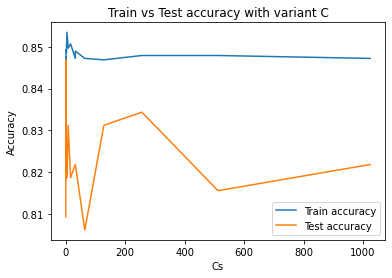

In [31]:
plt.plot(vals,accuracy_train_linear)
plt.plot(vals,accuracy_test_linear)
plt.ylabel("Accuracy")
plt.xlabel("Cs")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Train vs Test accuracy with variant C")
plt.show()

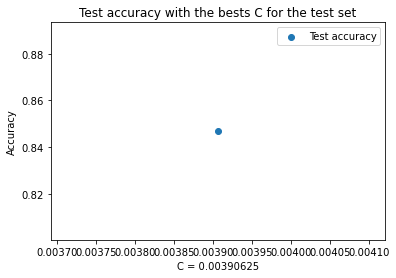

In [32]:
plt.scatter(Best_C_linear,best_accuracy_test_linear)
plt.ylabel("Accuracy")
plt.xlabel("C = " + str(Best_C_linear))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the bests C for the test set")
plt.show()

Mean linear kernel classification:  0.8465509259259262
Mean linear kernel accuracy:  0.8409374999999998
Mean linear kernel F1:  0.829810974948965


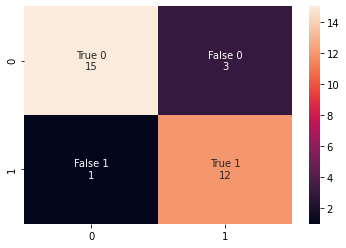

In [33]:
cm_linear = np.array([np.around(np.mean(all_tn_linear), 0), np.around(np.mean(all_fn_linear), 0), np.around(np.mean(all_fp_linear), 0), np.around(np.mean(all_tp_linear), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_linear]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_linear.reshape(2,2), annot=labels, fmt="")

print("Mean linear kernel classification: ", np.mean(all_best_accuracy_train_linear))
print("Mean linear kernel accuracy: ", np.mean(all_best_accuracy_test_linear))
print("Mean linear kernel F1: ", np.mean(all_best_f1_score_linear))

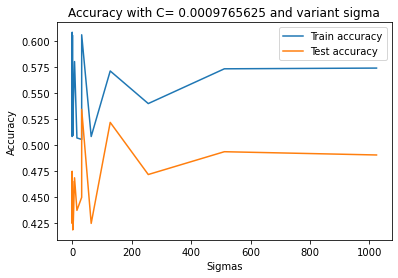

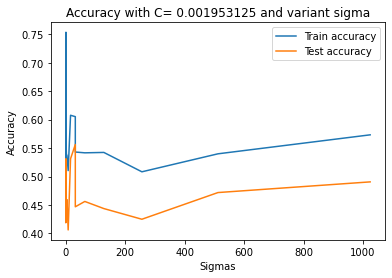

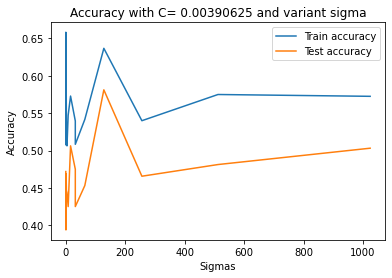

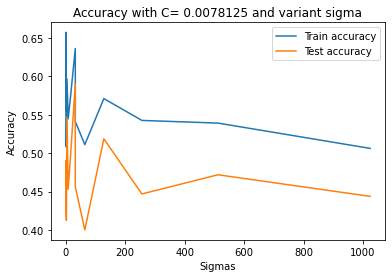

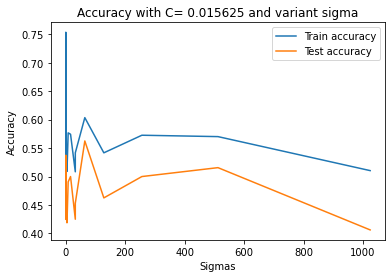

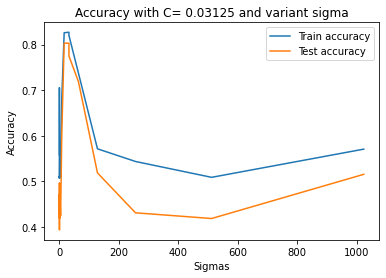

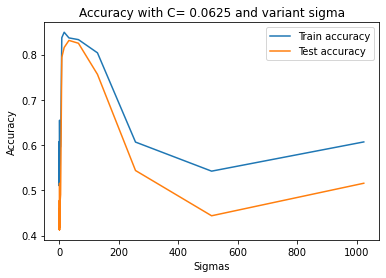

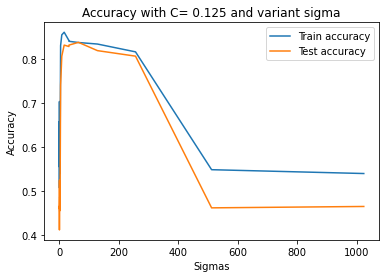

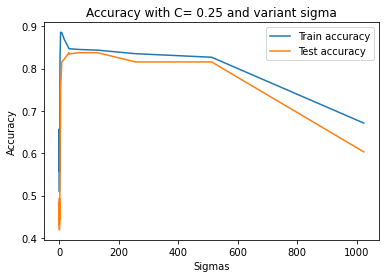

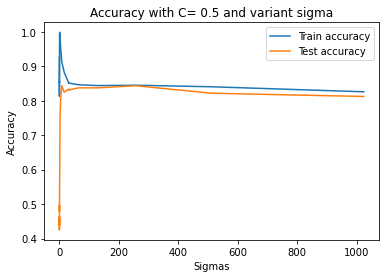

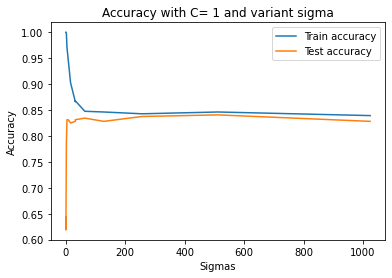

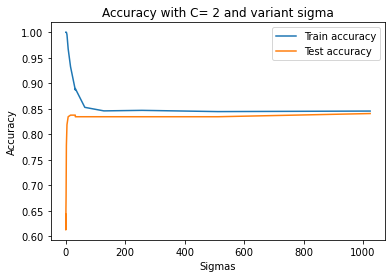

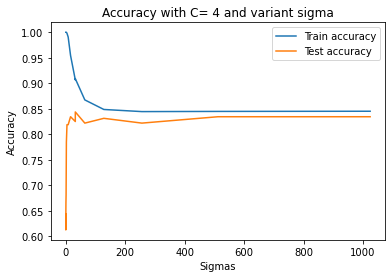

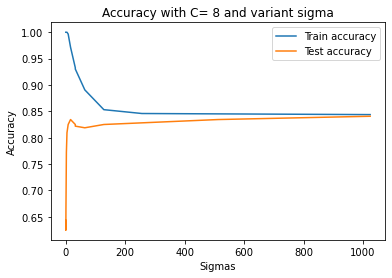

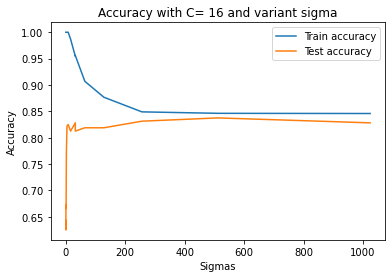

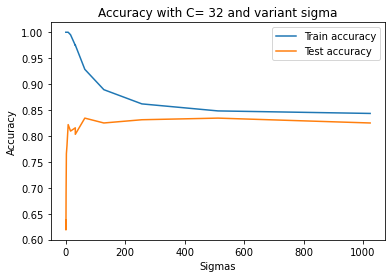

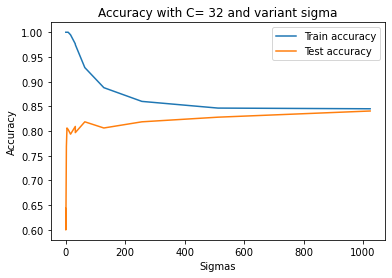

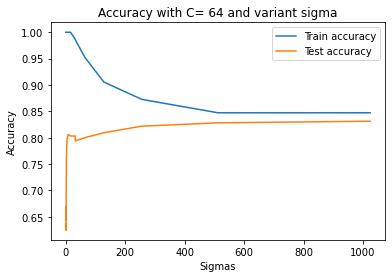

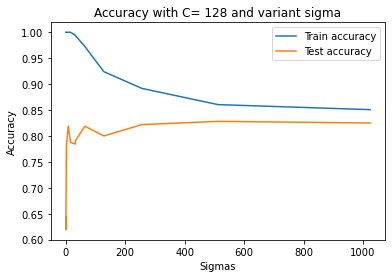

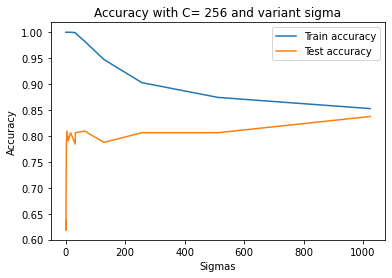

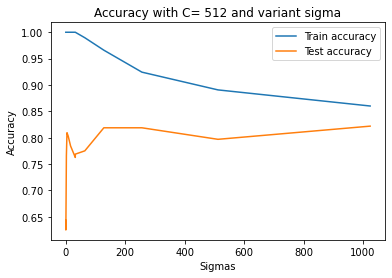

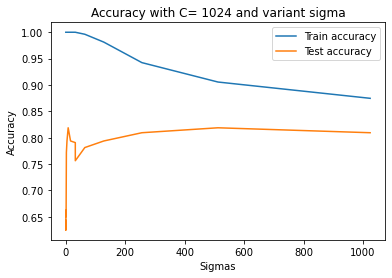

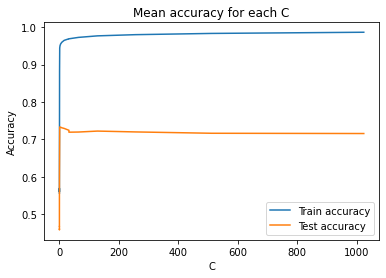

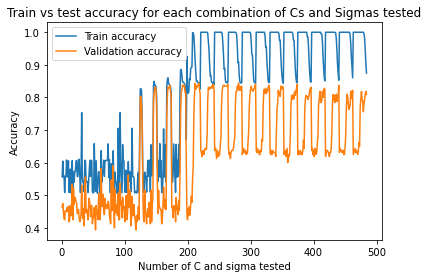

0.9131944444444444
0.84375


In [34]:
mean_acc_train_fixed_c = []
mean_acc_test_fixed_c = []

for i in range(len(vals)):
    plt.plot(vals,accuracy_train_gaussian[22*i:22*(i+1)])
    plt.plot(vals,accuracy_test_gaussian[22*i:22*(i+1)])
    mean_acc_train_fixed_c.append(np.mean(accuracy_train_gaussian[22*i:22*(i+1)]))
    mean_acc_test_fixed_c.append(np.mean(accuracy_test_gaussian[22*i:22*(i+1)]))
    plt.ylabel("Accuracy")
    plt.xlabel("Sigmas")
    plt.legend(["Train accuracy","Test accuracy"])
    plt.title("Accuracy with C= "+str(vals[i])+ " and variant sigma")
    plt.show()

plt.plot(vals, mean_acc_train_fixed_c)
plt.plot(vals, mean_acc_test_fixed_c)
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Mean accuracy for each C")
plt.show()

plt.plot(range(1,len(accuracy_train_gaussian)+1),accuracy_train_gaussian)
plt.plot(range(1,len(accuracy_test_gaussian)+1),accuracy_test_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("Number of C and sigma tested")
plt.legend(["Train accuracy", "Validation accuracy"])
plt.title("Train vs test accuracy for each combination of Cs and Sigmas tested")
plt.show()

print(best_accuracy_train_gaussian)
print(best_accuracy_test_gaussian)

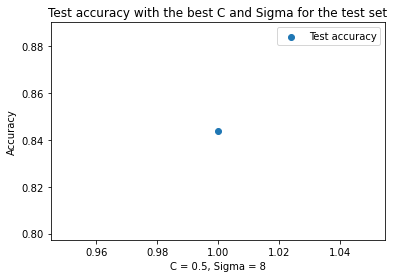

In [35]:
plt.scatter(1,best_accuracy_test_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("C = " +str(Best_C_gaussian)+", Sigma = "+str(Best_Sigma_gaussian))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the best C and Sigma for the test set")
plt.show()

Mean gaussian kernel classification:  0.9114120370370369
Mean gaussian kernel accuracy:  0.8402083333333333
Mean gaussian kernel F1:  0.8337400359497582


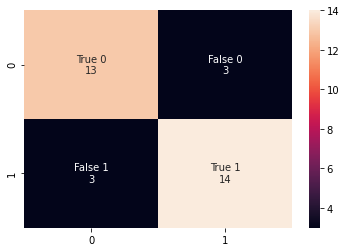

In [36]:
cm_gaussian = np.array([np.around(np.mean(all_tn_gaussian), 0), np.around(np.mean(all_fn_gaussian), 0), np.around(np.mean(all_fp_gaussian), 0), np.around(np.mean(all_tp_gaussian), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_gaussian]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gaussian.reshape(2,2), annot=labels, fmt="")

print("Mean gaussian kernel classification: ", np.mean(all_best_accuracy_train_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(all_best_accuracy_test_gaussian))
print("Mean gaussian kernel F1: ", np.mean(all_best_f1_score_gaussian))